# C8M2 Notebook 1: Area Plots, Histogram, Bar Charts

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use("ggplot")

In [3]:
df = pd.read_csv("datasets/canada_csv.csv", index_col = 0)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [4]:
df.shape

(195, 38)

## Area Plots

In [5]:
years = [str(i) for i in range(1980, 2014)]

In [7]:
df.sort_values(by = "Total", ascending = False, axis = 0, inplace = True)
top_five = df.head()
top_five = top_five[years].transpose()
top_five.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


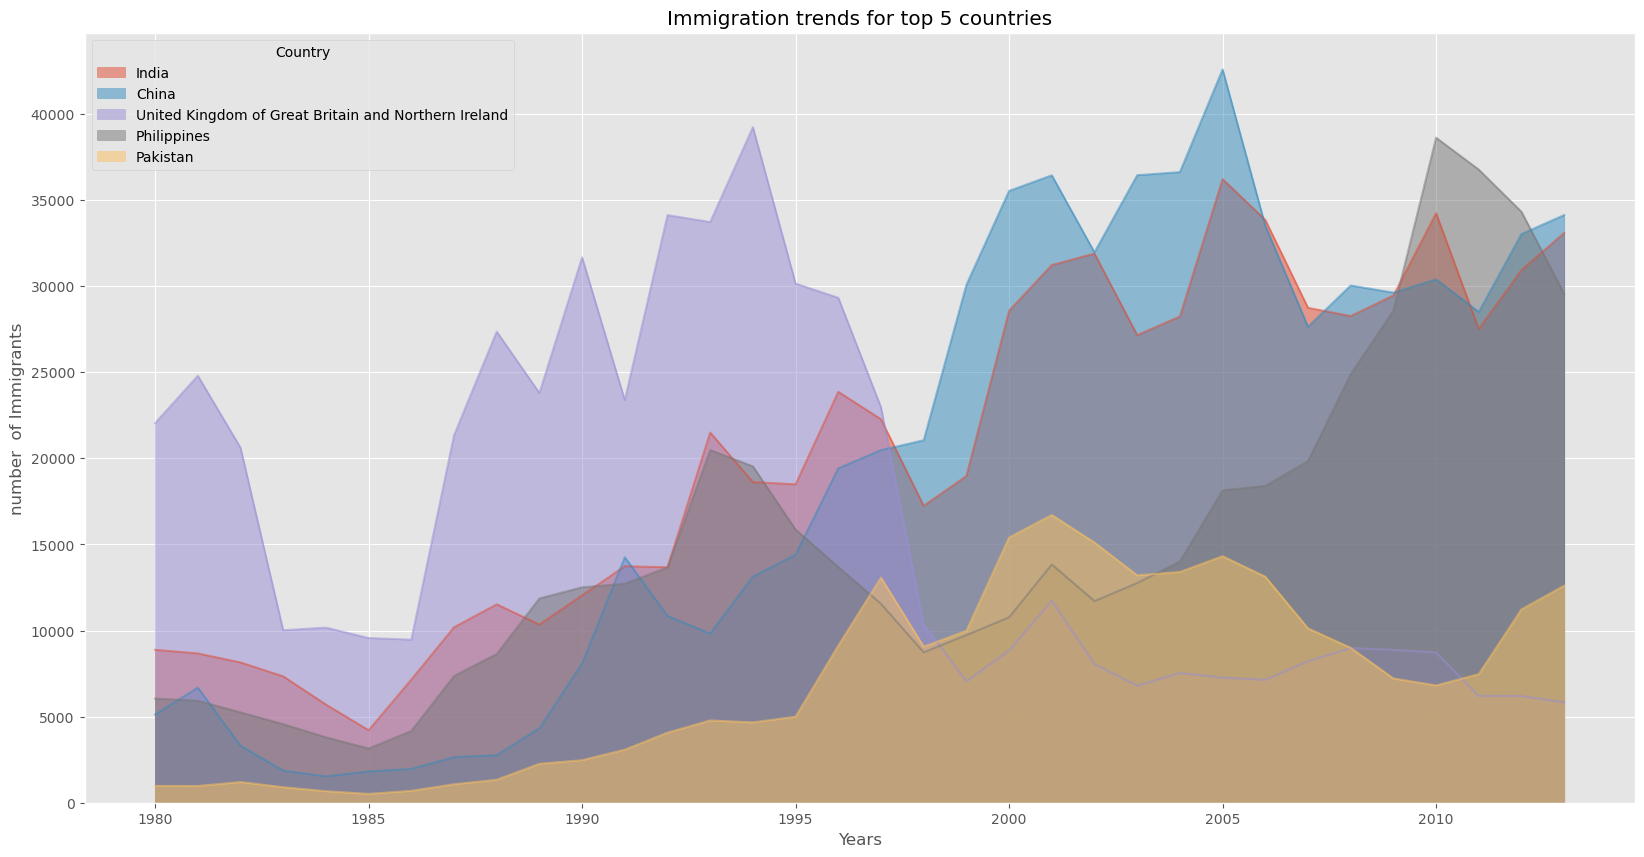

In [12]:
top_five.index = top_five.index.map(int)

top_five.plot(kind= "area",
              stacked = False,
              figsize =  (20, 10)) 
# stacked parameter decided the transparency (default = 0.5), which could be controlled by parameter alpha

plt.title("Immigration trends for top 5 countries")
plt.ylabel("number  of Immigrants")
plt.xlabel("Years")

plt.show()

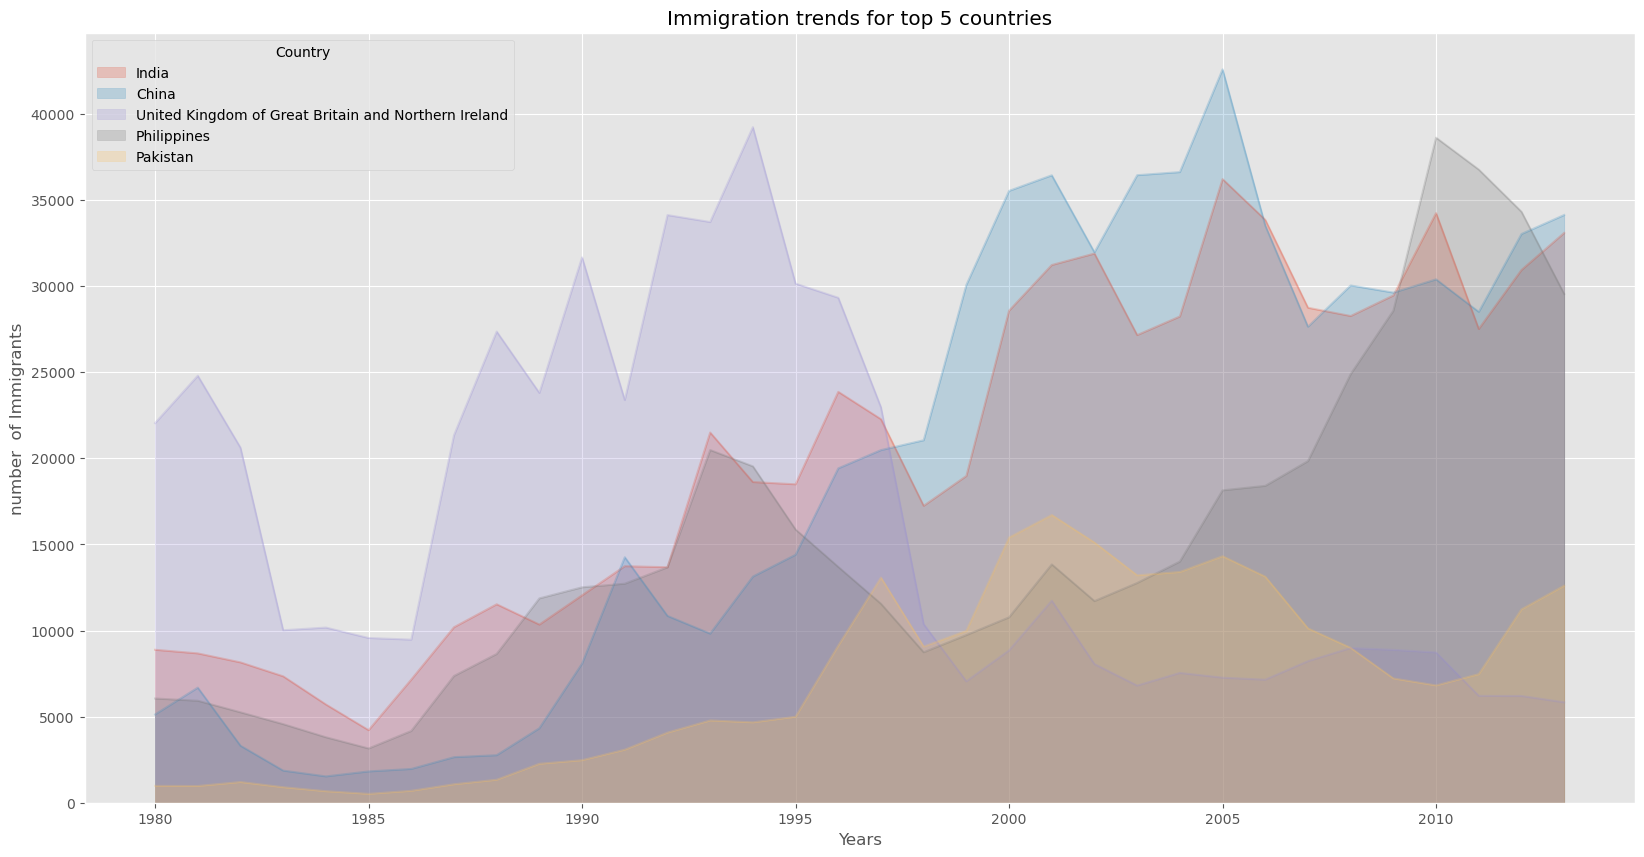

In [14]:
top_five.plot(kind= "area",
              alpha = 0.25,
              stacked = False,
             figsize= (20, 10))

plt.title("Immigration trends for top 5 countries")
plt.ylabel("number  of Immigrants")
plt.xlabel("Years")

plt.show()

### Two types of plotting

As we discussed in the video lectures, there are two styles/options of plotting with `matplotlib`， plotting using the Artist layer and plotting using the scripting layer.

**Option 1: Scripting layer (procedural method) - using matplotlib.pyplot as 'plt'**

You can use `plt` i.e. `matplotlib.pyplot` and add more elements by calling different methods procedurally; for example, `plt.title(...)` to add title or `plt.xlabel(...)` to add label to the x-axis.

```python
    # Option 1: This is what we have been using so far
    df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10)) 
    plt.title('Immigration trend of top 5 countries')
    plt.ylabel('Number of immigrants')
    plt.xlabel('Years')
```

**Option 2: Artist layer (Object oriented method) - using an `Axes` instance from Matplotlib (preferred)**

You can use an `Axes` instance of your current plot and store it in a variable (eg. `ax`). You can add more elements by calling methods with a little change in syntax (by adding "`set_`" to the previous methods). For example, use `ax.set_title()` instead of `plt.title()` to add title,  or `ax.set_xlabel()` instead of `plt.xlabel()` to add label to the x-axis.

This option sometimes is more transparent and flexible to use for advanced plots (in particular when having multiple plots, as you will see later).

In this course, we will stick to the **scripting layer**, except for some advanced visualizations where we will need to use the **artist layer** to manipulate advanced aspects of the plots.


Text(0, 0.5, 'Number of  Immigrants')

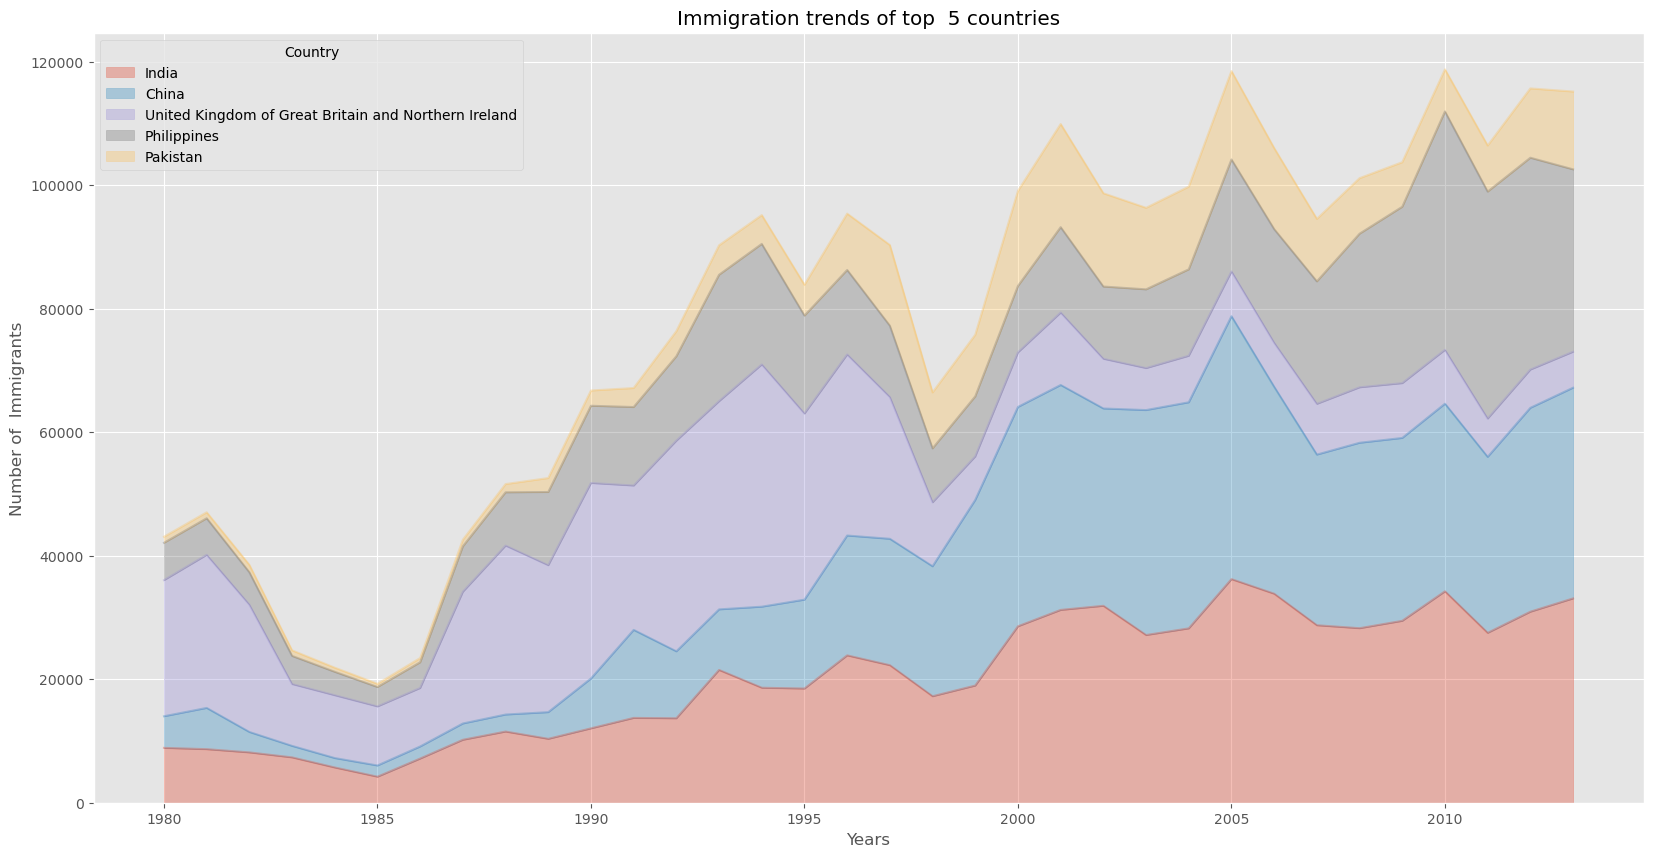

In [16]:
# type 2 plotting
ax = top_five.plot(kind = "area",
                   alpha = 0.35,
                   figsize = (20, 10))
ax.set_title("Immigration trends of top  5 countries")
ax.set_xlabel("Years")
ax.set_ylabel("Number of  Immigrants")

In [19]:
# test: area plot of countries with least immigration
bottom_five = df.tail()
bottom_five = bottom_five[years].transpose()
bottom_five.head()

Country,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
1980,1,0,0,0,0
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


Text(0, 0.5, 'Number of Immigrants')

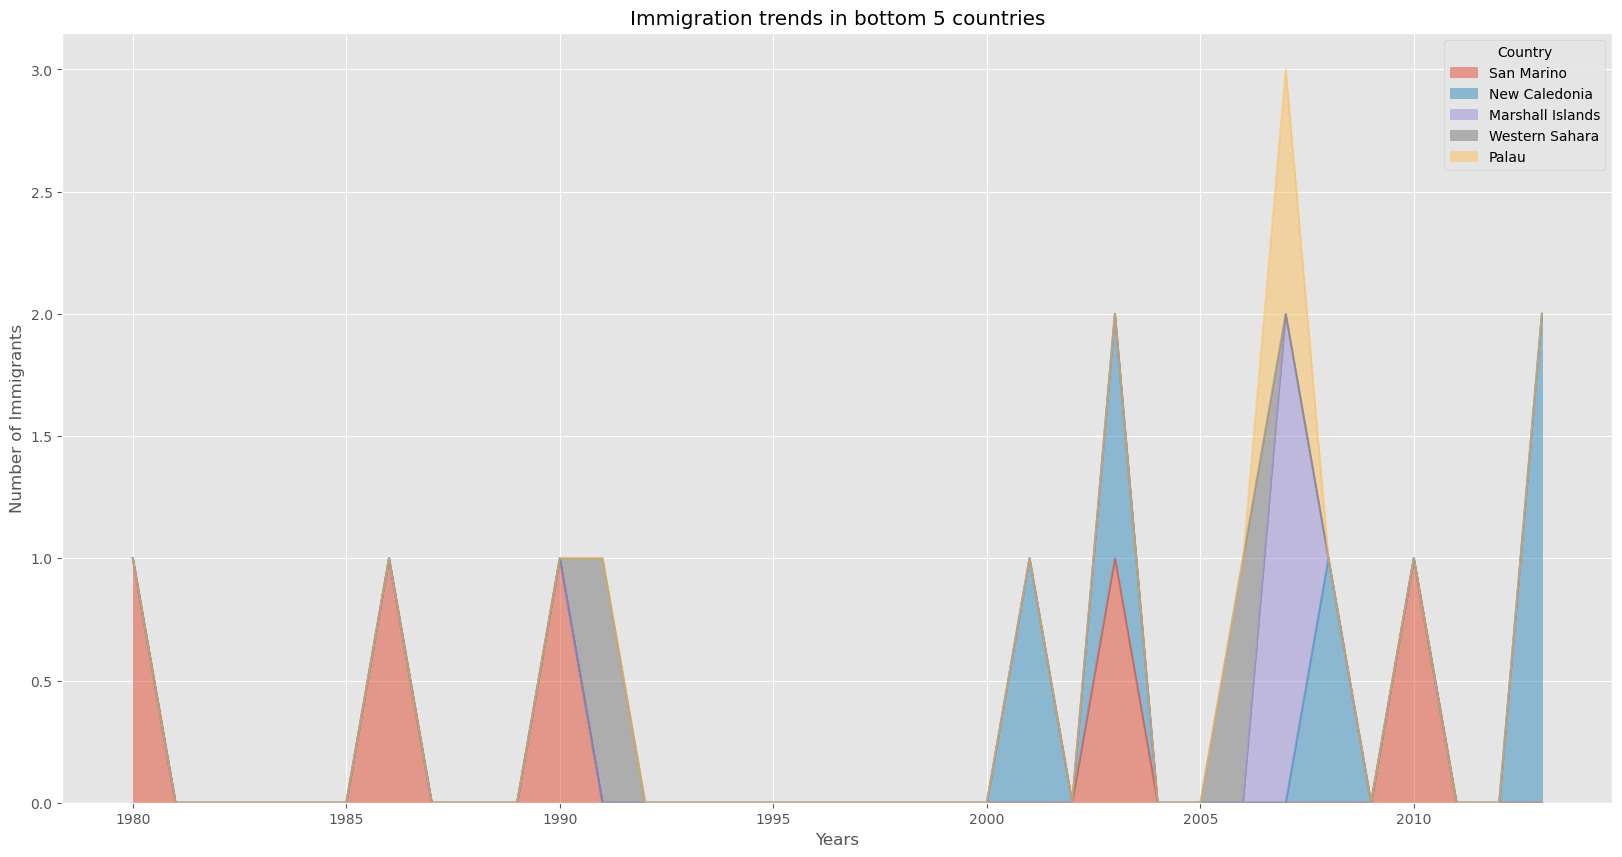

In [20]:
ax = bottom_five.plot(kind = "area",
                      alpha = 0.5,
                      figsize = (20,10))

ax.set_title("Immigration trends in bottom 5 countries")
ax.set_xlabel("Years")
ax.set_ylabel("Number of Immigrants")

---
## Histogram
# Histograms<a id="8"></a>

A histogram is a way of representing the *frequency* distribution of numeric dataset. The way it works is it partitions the x-axis into *bins*, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.

**Question:** What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

Before we proceed with creating the histogram plot, let's first examine the data split into intervals. To do this, we will us **Numpy**'s `histrogram` method to get the bin ranges and frequency counts as follows:

In [22]:
df["2013"].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [24]:
count, bin_edges = np.histogram(df["2013"])

print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


By default, the `histrogram` method breaks up the dataset into 10 bins. The figure below summarizes the bin ranges and the frequency distribution of immigration in 2013. We can see that in 2013:

*   178 countries contributed between 0 to 3412.9 immigrants
*   11 countries contributed between 3412.9 to 6825.8 immigrants
*   1 country contributed between 6285.8 to 10238.7 immigrants, and so on..

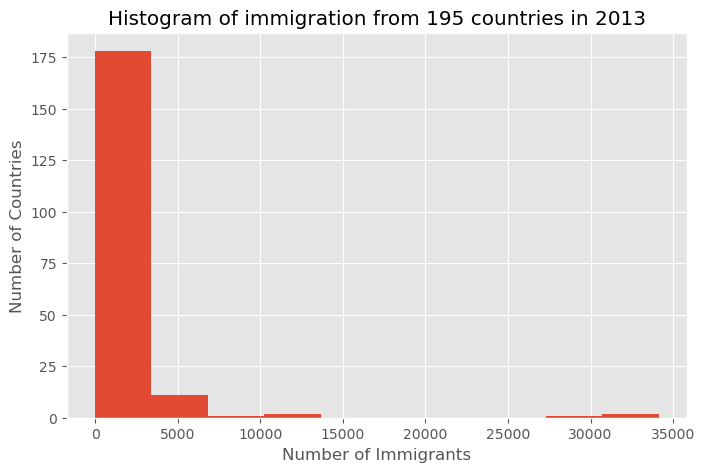

In [33]:
df["2013"].plot(kind = "hist",
                figsize = (8, 5))

plt.title("Histogram of immigration from 195 countries in 2013")
plt.ylabel("Number of Countries")
plt.xlabel("Number of Immigrants")

plt.show()

In the above plot, the x-axis represents the population range of immigrants in intervals of 3412.9. The y-axis represents the number of countries that contributed to the aforementioned population.

Notice that the x-axis labels do not match with the bin size. This can be fixed by passing in a `xticks` keyword that contains the list of the bin sizes, as follows:


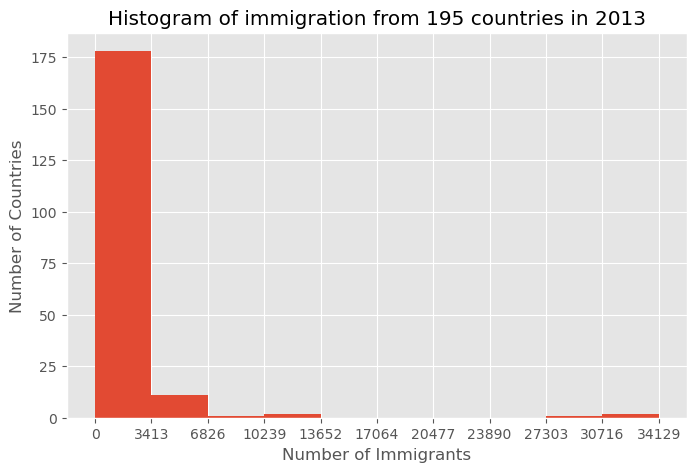

In [32]:
# using bin edges
df["2013"].plot(kind= "hist",
                figsize  = (8, 5),
                xticks = bin_edges)

plt.title("Histogram of immigration from 195 countries in 2013")
plt.ylabel("Number of Countries")
plt.xlabel("Number of Immigrants")

plt.show()

We can also plot multiple histograms on the same plot. For example, let's try to answer the following questions using a histogram.

**Question**: What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?


In [28]:
df.loc[["Denmark", "Norway", "Sweden"], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


<Axes: ylabel='Frequency'>

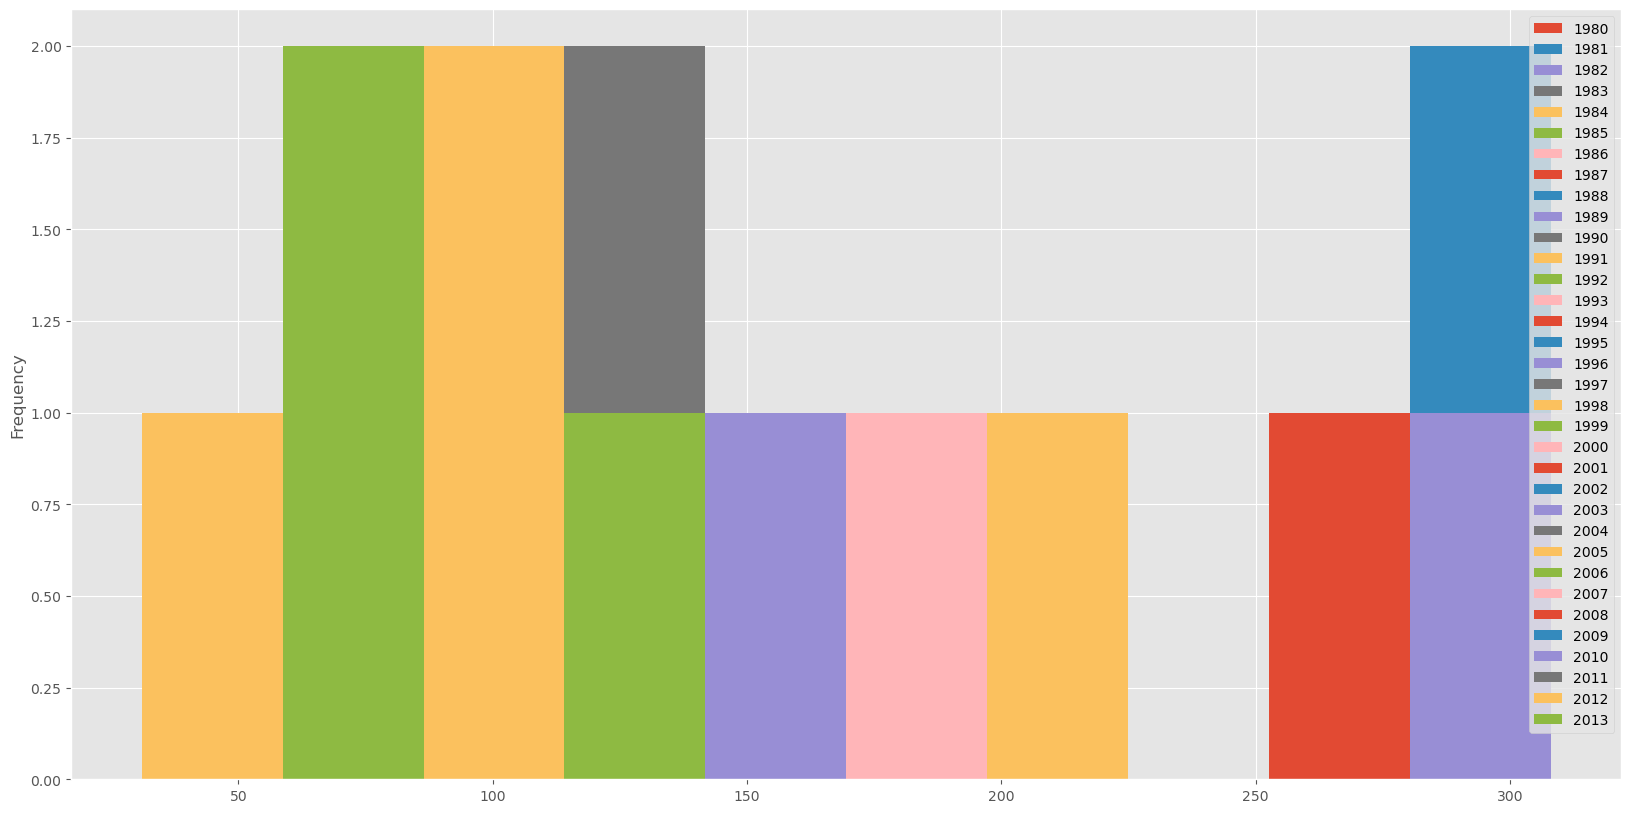

In [30]:
df.loc[["Denmark", "Norway", "Sweden"], years].plot(kind = "hist", figsize = (20, 10))

This looks bad. this issue could be solved easily.
Instead of plotting the population frequency distribution of the population for the 3 countries, *pandas* instead plotted the population frequency distribution for the `years`.

This can be easily fixed by first transposing the dataset, and then plotting as shown below.

In [31]:
df_three = df.loc[["Denmark", "Norway", "Sweden"], years].transpose()
df_three.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


Text(0, 0.5, 'Number of Years')

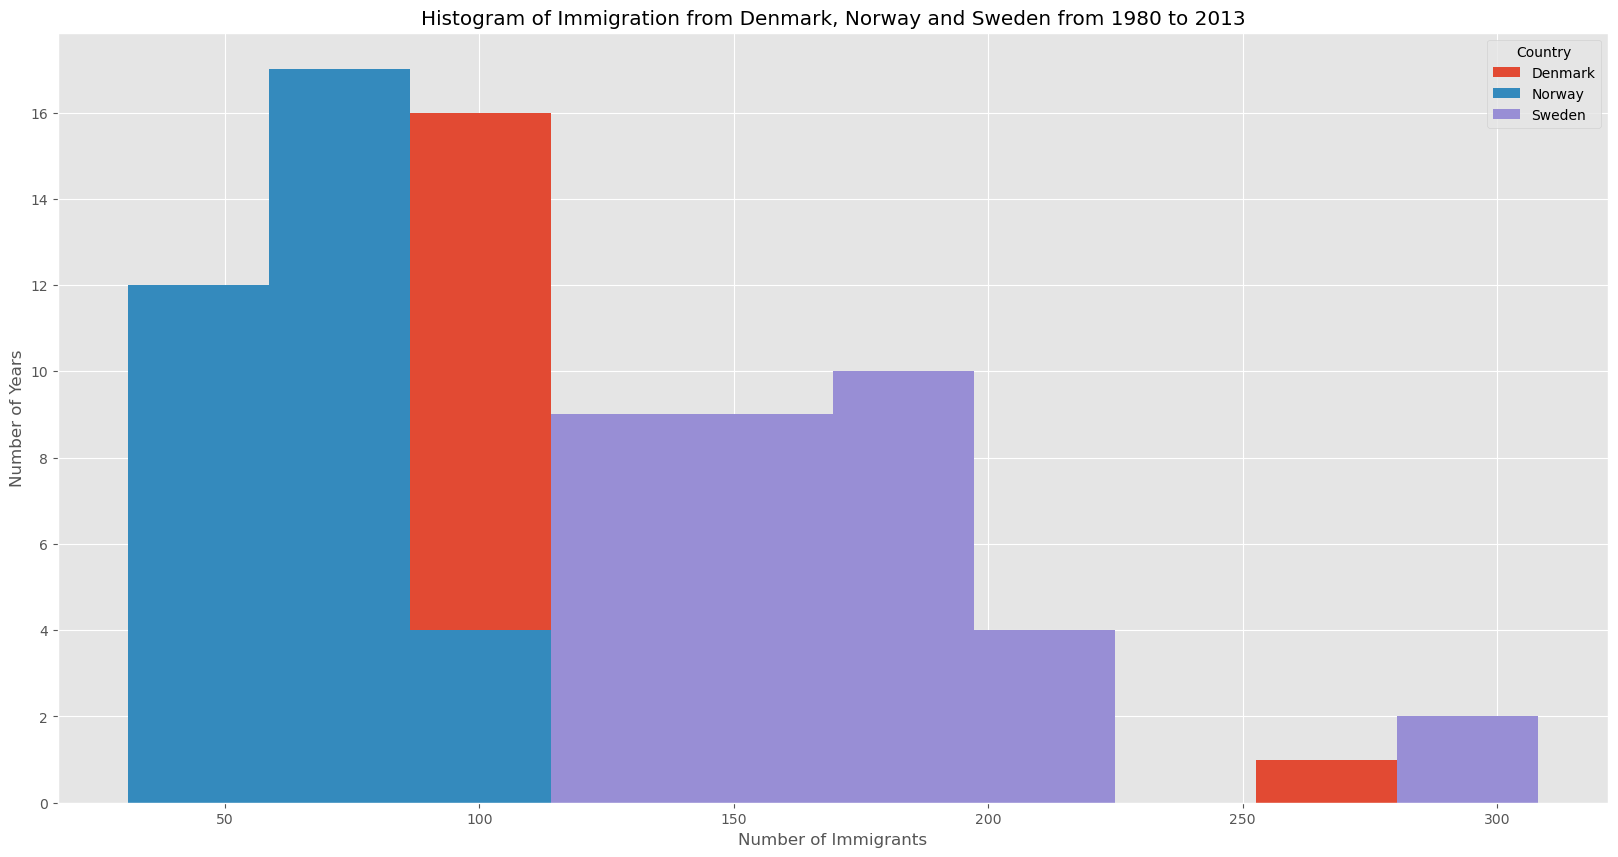

In [36]:
# using type 2
ax = df_three.plot(kind = "hist",
                   figsize = (20, 10))

ax.set_title("Histogram of Immigration from Denmark, Norway and Sweden from 1980 to 2013")
ax.set_xlabel("Number of Immigrants")
ax.set_ylabel("Number of Years")

Let's make a few modifications to improve the impact and aesthetics of the previous plot:

*   increase the bin size to 15 by passing in `bins` parameter;
*   set transparency to 60% by passing in `alpha` parameter;
*   label the x-axis by passing in `x-label` parameter;
*   change the colors of the plots by passing in `color` parameter.


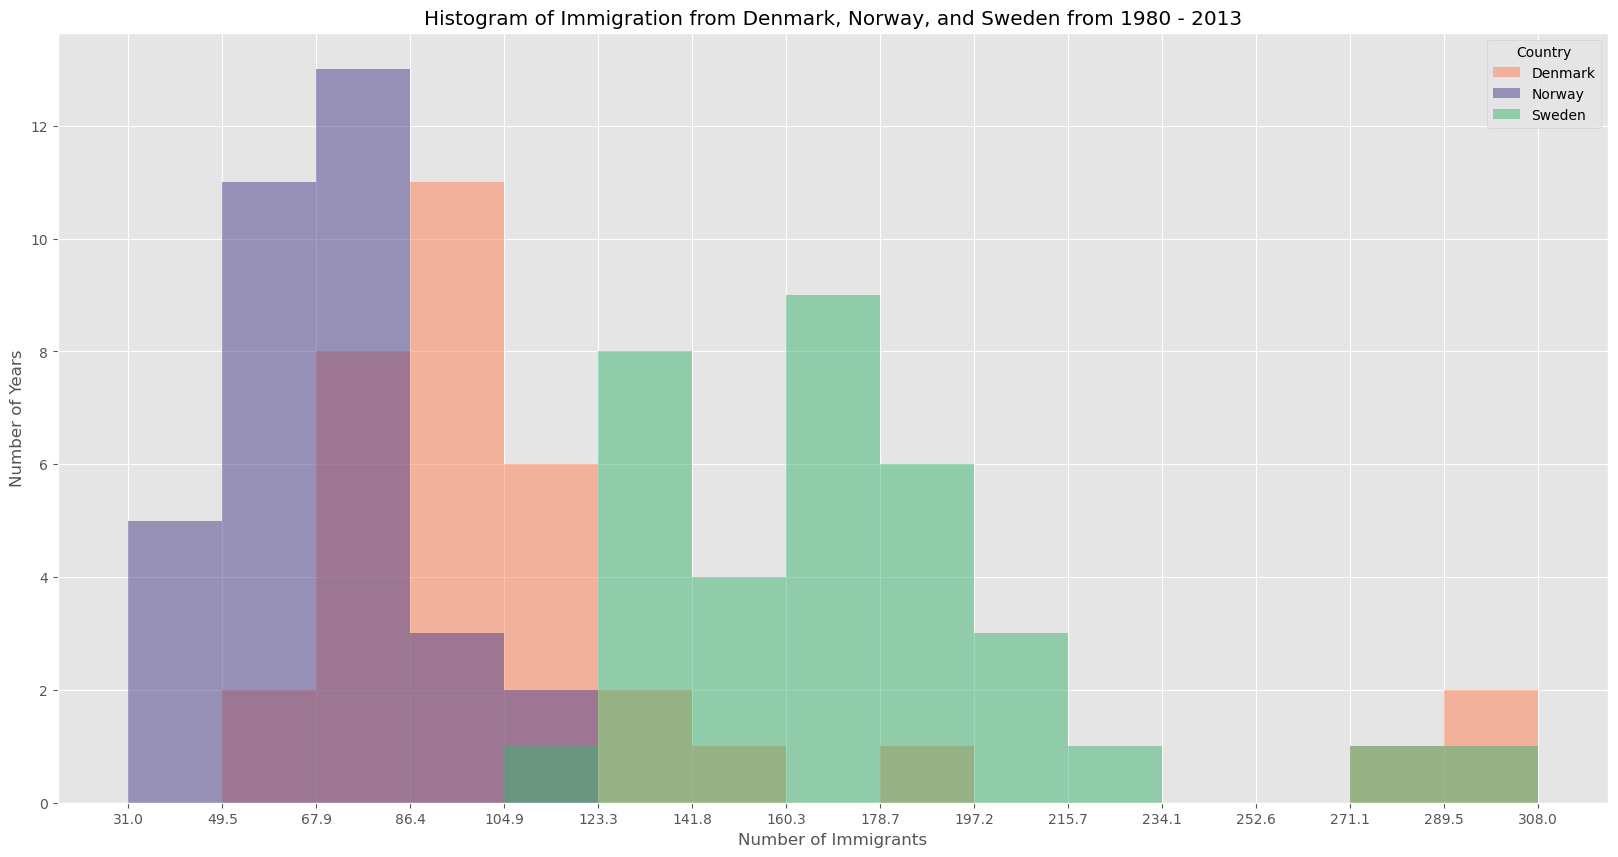

In [38]:
count, bin_edges = np.histogram(df_three, 15)

df_three.plot(kind = "hist",
              figsize = (20, 10),
              bins = 15,
              alpha = 0.5,
              xticks = bin_edges,
              color = ["coral", "darkslateblue", "mediumseagreen"]
             )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

If we do not want the plots to overlap each other, we can stack them using the `stacked` parameter. Let's also adjust the min and max x-axis labels to remove the extra gap on the edges of the plot. We can pass a tuple (min,max) using the `xlim` paramater, as show below.


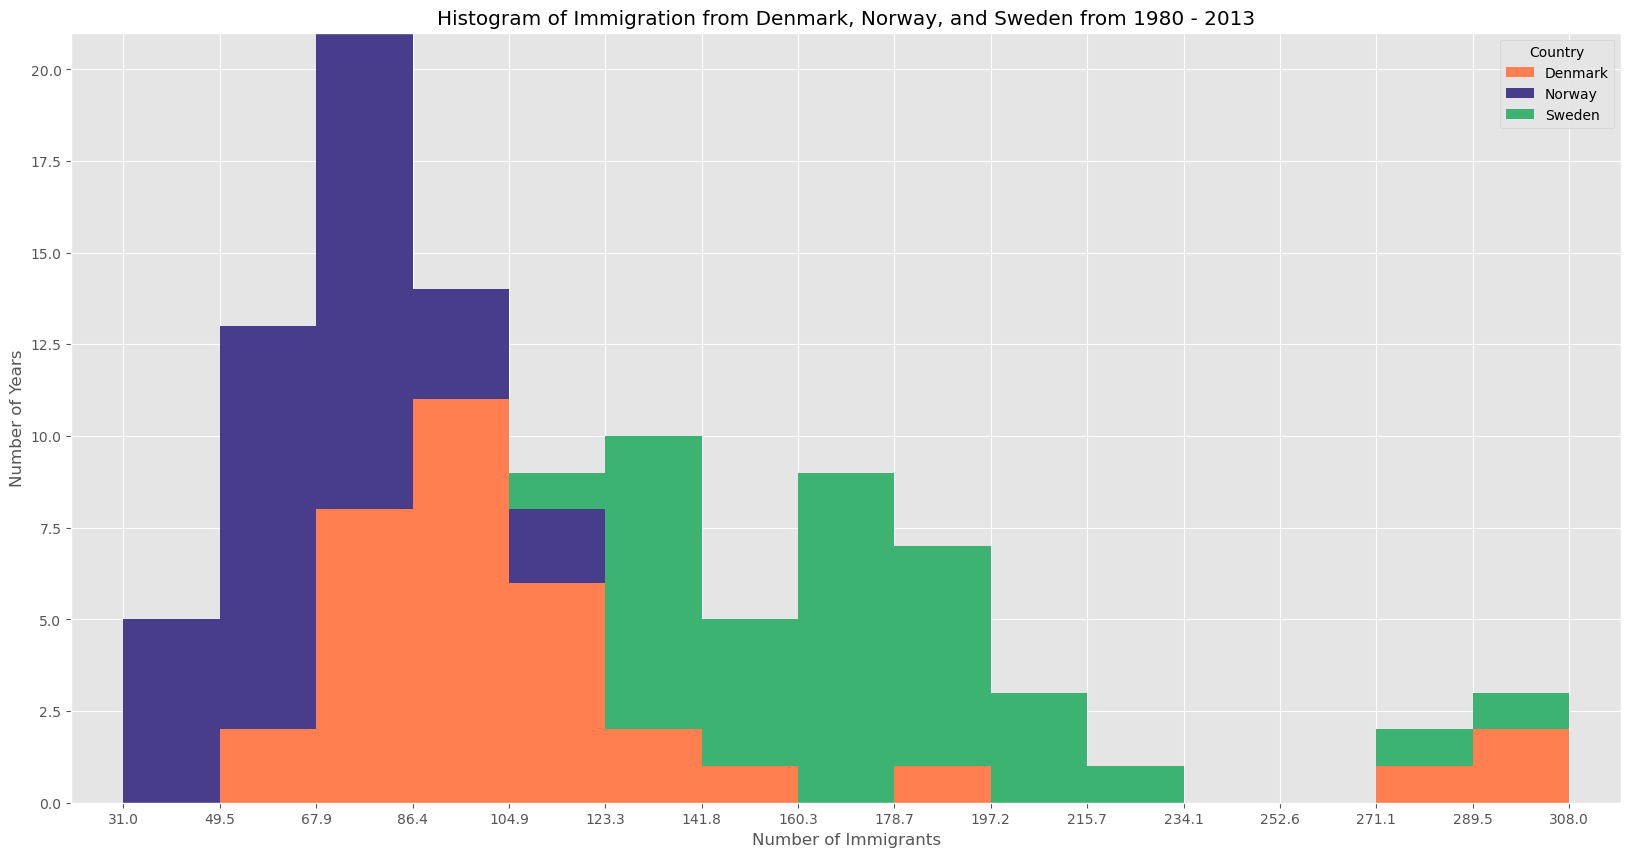

In [40]:
count, bin_edges = np.histogram(df_three, 15)

x_min = bin_edges[0] - 10
x_max = bin_edges[-1] + 10

df_three.plot(kind = "hist",
              figsize = (20, 10),
              bins = 15,
              xticks = bin_edges,
              stacked = True,
              xlim = (x_min, x_max),
              color = ["coral", "darkslateblue", "mediumseagreen"]
             )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

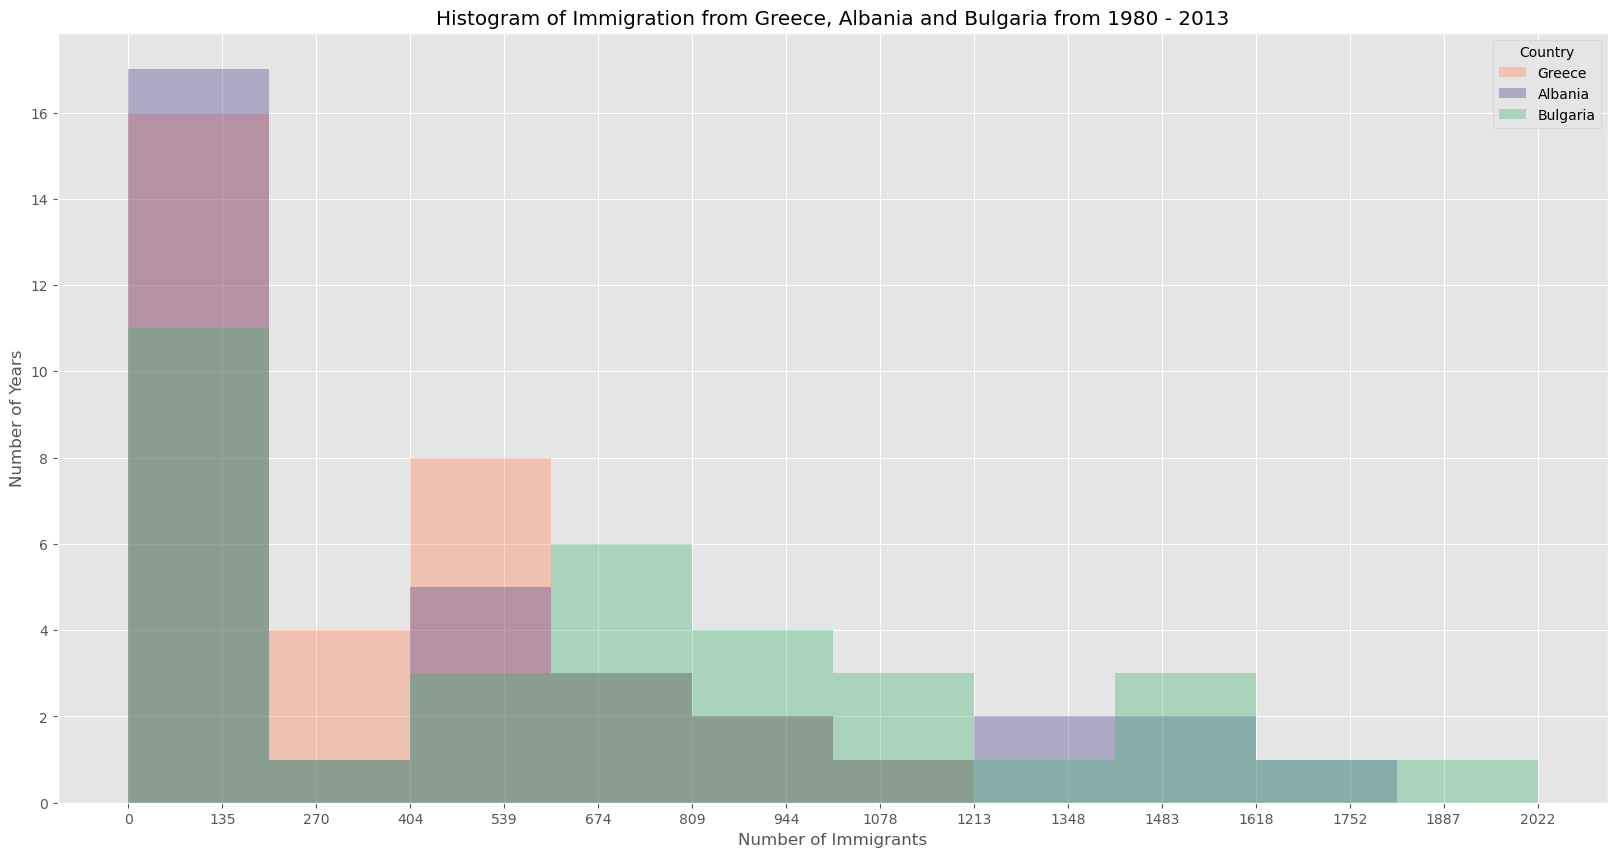

In [46]:
# task

df_three = df.loc[["Greece", "Albania", "Bulgaria"],years].transpose()
#df_three.head()

counts, bin_edges = np.histogram(df_three, 15)

df_three.plot(kind = "hist",
              stacked = False,
              alpha = 0.35,
              figsize = (20, 10),
              xticks = bin_edges,
              color=['coral', 'darkslateblue', 'mediumseagreen']
             )

plt.title('Histogram of Immigration from Greece, Albania and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

---
## Bar Charts

A bar plot is a way of representing data where the *length* of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals.

To create a bar plot, we can pass one of two arguments via `kind` parameter in `plot()`:

*   `kind=bar` creates a *vertical* bar plot
*   `kind=barh` creates a *horizontal* bar plot

**Vertical bar plot**

In vertical bar graphs, the x-axis is used for labelling, and the length of bars on the y-axis corresponds to the magnitude of the variable being measured. Vertical bar graphs are particularly useful in analyzing time series data. One disadvantage is that they lack space for text labelling at the foot of each bar.

**Let's start off by analyzing the effect of Iceland's Financial Crisis:**

The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.

**Question:** Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.


In [47]:
df_iceland = df.loc["Iceland", years]  # series type
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

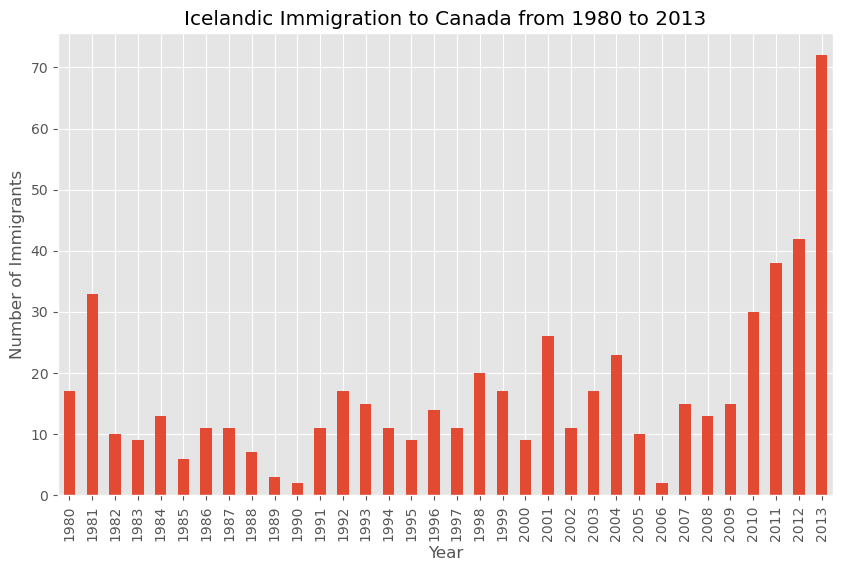

In [51]:
df_iceland.plot(kind = "bar",
        figsize = (10, 6))
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")
plt.title("Icelandic Immigration to Canada from 1980 to 2013")

plt.show()

The bar plot above shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008.

Let's annotate this on the plot using the `annotate` method of the **scripting layer** or the **pyplot interface**. We will pass in the following parameters:

*   `s`: str, the text of annotation.
*   `xy`: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
*   `xytext`: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
*   `xycoords`: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
*   `arrowprops`: Takes a dictionary of properties to draw the arrow:
    *   `arrowstyle`: Specifies the arrow style, `'->'` is standard arrow.
    *   `connectionstyle`: Specifies the connection type. `arc3` is a straight line.
    *   `color`: Specifies color of arrow.
    *   `lw`: Specifies the line width.

use below documentation to learn more about annotation:
<https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html>.


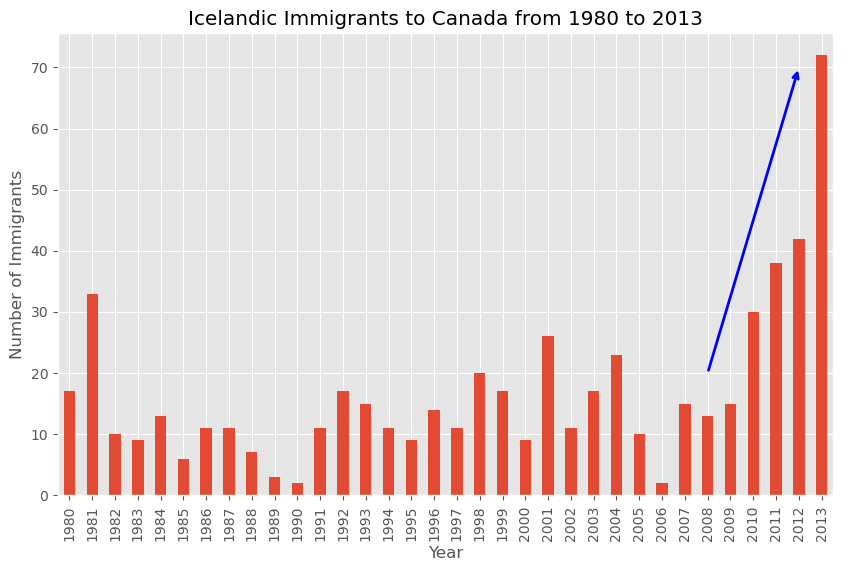

In [54]:
df_iceland.plot(kind = "bar",
                figsize = (10, 6),
                rot = 90)   # rotate the xticks by 90 degree

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

#Annotating Arrow
plt.annotate("", #s: left blank for no text
             xy = (32, 70),# placing the head of the arrow at point (2012, 70)
             xytext = (28, 20), # placing base of the arrow at thew point (2008, 20)
             xycoords = "data", # will use the co-ordinate system of the object being annotated
             arrowprops = dict(arrowstyle= "->", connectionstyle = "arc3", color="blue", lw = 2)
            )

plt.show()

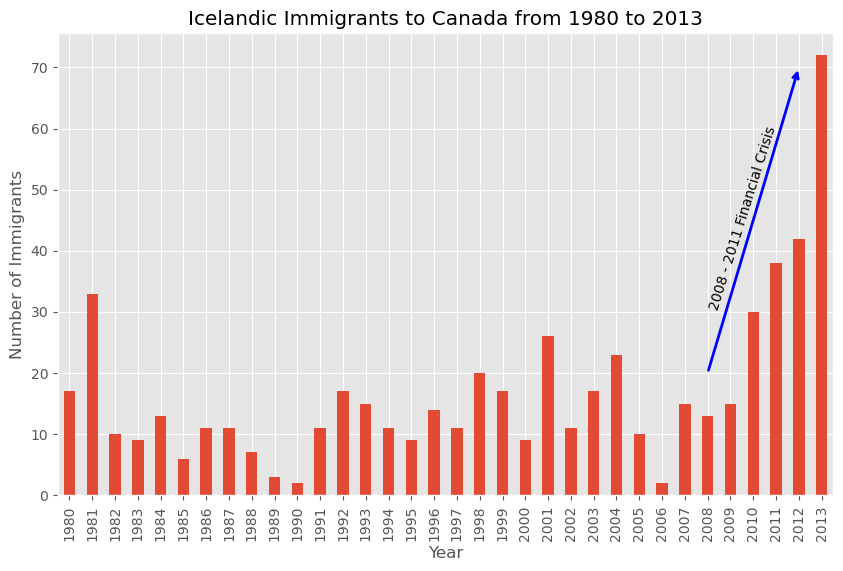

In [59]:
df_iceland.plot(kind = "bar",
                figsize = (10, 6),
                rot = 90)   # rotate the xticks by 90 degree

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

#Annotating Arrow
plt.annotate("", #s: left blank for no text
             xy = (32, 70),# placing the head of the arrow at point (2012, 70)
             xytext = (28, 20), # placing base of the arrow at thew point (2008, 20)
             xycoords = "data", # will use the co-ordinate system of the object being annotated
             arrowprops = dict(arrowstyle= "->", connectionstyle = "arc3", color="blue", lw = 2)
            )

#Annotating Test

plt.annotate("2008 - 2011 Financial Crisis",  #text to display
             xy = (28, 30), #starting point of the  text)
             rotation = 72.5, #based on trial and error
             va = "bottom", #to make text vertically bottom alligned
             ha = "left" # to make test horizintally left alligned
            )

plt.show()

**Horizontal Bar Plot**

Sometimes it is more practical to represent the data horizontally, especially if you need more room for labelling the bars. In horizontal bar graphs, the y-axis is used for labelling, and the length of bars on the x-axis corresponds to the magnitude of the variable being measured. As you will see, there is more room on the y-axis to  label categorical variables.

**Question:** Using the scripting later and the `df_can` dataset, create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.


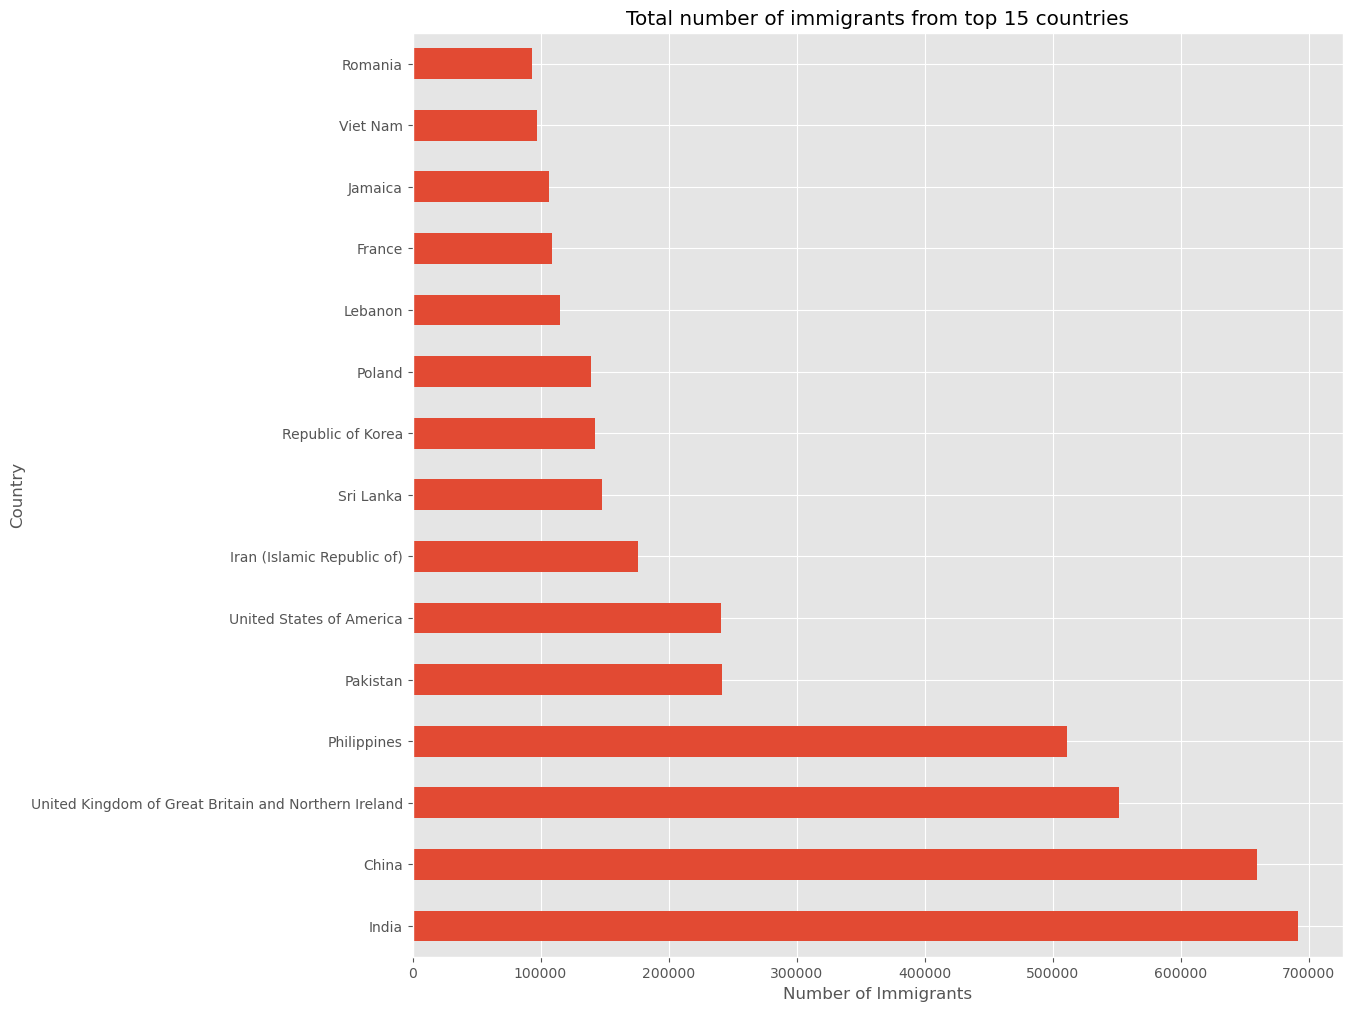

In [70]:
top_fifteen = df["Total"].head(15)

top_fifteen.plot(kind = "barh",
                 figsize = (12, 12))

plt.title("Total number of immigrants from top 15 countries")
plt.ylabel("Country")
plt.xlabel("Number of Immigrants")

plt.show()

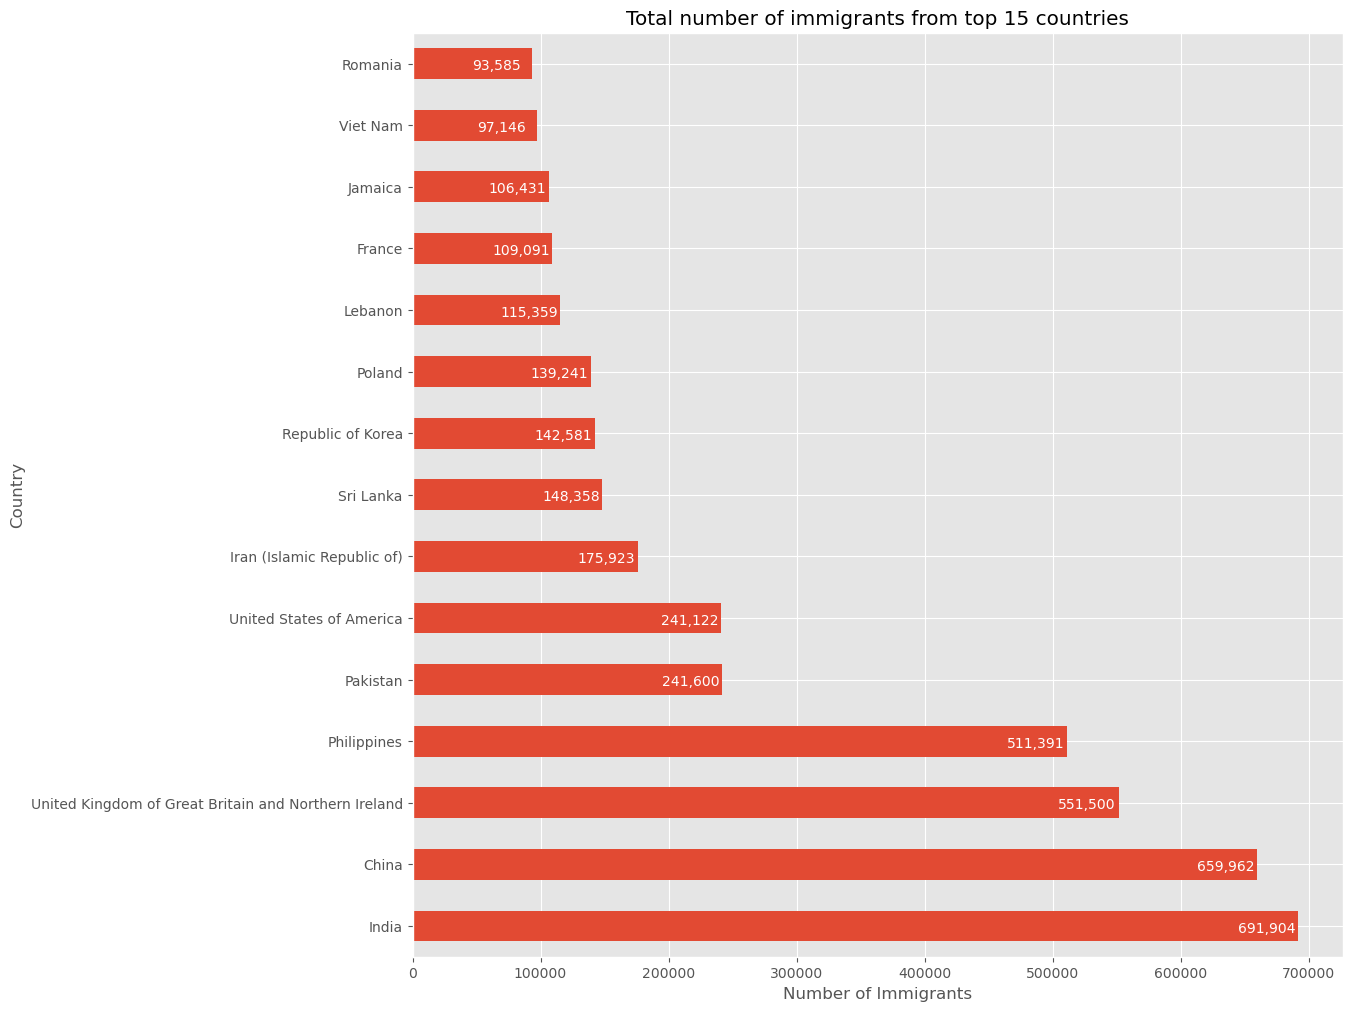

In [69]:
#using annotation
top_fifteen = df["Total"].head(15)

top_fifteen.plot(kind = "barh",
                 figsize = (12, 12))

for index, value in enumerate(top_fifteen):
    label = format(int(value), ",")
    plt.annotate(label,
                 xy = (value-47000, index -0.10),
                 color = "white"
                )

plt.title("Total number of immigrants from top 15 countries")
plt.ylabel("Country")
plt.xlabel("Number of Immigrants")

plt.show()

---
Thank You!